In [15]:
#you must import 6 libraries!
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import Inflow
Inflow.logging.enable_logging()
import ResearchProjects
import pandas as pd
import one

In [16]:
#adaptation is a sublibrary within the ResearchProject
from ResearchProjects import adaptation
#inside adaptation experiment there are different file, we import the "aliases"
from ResearchProjects.adaptation import aliases

In [17]:
connector = one.ONE()
connector.set_data_access_mode('remote')
ResearchProjects.core?
ResearchProjects.adaptation.select.cells_labelled
display(ResearchProjects.adaptation.select.cells_labelled)

<function ResearchProjects.adaptation.select.cells_labelled(rois_df, iscell=True, **kwargs)>

Type:        module
String form: <module 'ResearchProjects.core' from 'C:\\Users\\mohay\\anaconda3\\envs\\Analysis\\lib\\site-packages\\ResearchProjects\\core.py'>
File:        c:\users\mohay\anaconda3\envs\analysis\lib\site-packages\researchprojects\core.py
Docstring:   <no docstring>

In [18]:
#sessions = connector.search(subject = "wm24",date_range = "2022-08-09",number = 1, details= True) ###Did not work(OSError: No result exists for trials_df in session wm24_2022_08_09_001)
sessions = connector.search(subject = 'wm24', date_range = "2022-08-22", number = 1,  details = True)
session = sessions.iloc[0]
session

subject                                                       wm24
start_time                                     2022-08-22T15:27:00
number                                                           1
lab                                                       HaissLab
projects                                              [Adaptation]
url              http://157.99.138.172/sessions/04f92e4a-da64-4...
task_protocol                                                     
date                                                    2022-08-22
json             {'channels': ['R', 'G'], 'whisker_stims': {'St...
extended_qc                            {'exclude_whisker': ['C1']}
rel_path                                       wm24\2022-08-22\001
alias_name                                     wm24_2022_08_22_001
short_path                                     wm24\2022-08-22\001
path             \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...
Name: 04f92e4a-da64-4018-aa6c-d9a79a91c831, dtype: object

In [19]:
trials_df = adaptation.pipelines.get_trials_df(session)
rois_df = adaptation.pipelines.get_rois_df(session) # load from file only. Faster but will not generate the data if none exists
trials_roi_df = adaptation.pipelines.get_trials_roi_df(session)

SAVE_INFO  : preprocessed_data            : Saving processed trials_df data at wm24\2022-08-22\001\preprocessing_saves\preproc_data.trials_df.pickle (overwriting)
INFO       : roi_signal_corrections       : Correcting signal F of 35 ROIs with rough neuropil correction and slow trend correction 
INFO       : slow_trend_correction        : Pooling processes for slow_trend_correction
INFO       : roi_signal_corrections       : All ROIs corrected successfully
INFO       : roi_signal_corrections       : Correcting signal Fneu of 35 ROIs with rough neuropil correction and slow trend correction 
INFO       : slow_trend_correction        : Pooling processes for slow_trend_correction
INFO       : roi_signal_corrections       : All ROIs corrected successfully
INFO       : rois_df                      : Generating signal variation measurement using method 'delta_over_F'
INFO       : rois_df                      : Generating is_neuron label based on iscell column values at 0 positionnal indices
IN

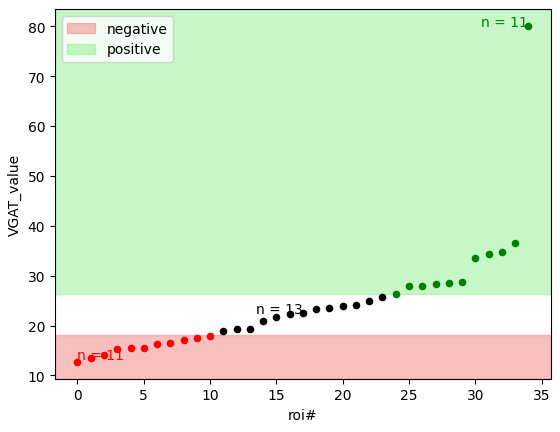

In [20]:
trials_df = adaptation.pipelines.generate_trials_df(session_details = session, refresh = True)
rois_df = adaptation.pipelines.generate_rois_df(session_details = session, refresh = True, sigma = 50, F0_index = 50, upper_perc = 70, lower_perc = 30)
trials_roi_df = adaptation.pipelines.generate_trials_roi_df(rois_df, trials_df, session_details = session, refresh_main_only = True)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(rois_df)

ypix   
roi#                                                      
0     [31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3...  \
1     [41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 4...   
2     [50, 50, 50, 51, 51, 51, 51, 51, 51, 52, 52, 5...   
3     [53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 5...   
4     [56, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 5...   
5     [61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 63, 6...   
6     [102, 102, 102, 102, 103, 103, 103, 103, 103, ...   
7     [106, 106, 106, 106, 106, 107, 107, 107, 107, ...   
8     [113, 113, 113, 114, 114, 114, 114, 114, 114, ...   
9     [113, 113, 113, 113, 114, 114, 114, 114, 114, ...   
10    [121, 121, 121, 121, 121, 121, 122, 122, 122, ...   
11    [124, 125, 125, 125, 125, 126, 126, 126, 126, ...   
12    [128, 128, 128, 129, 129, 129, 129, 129, 130, ...   
13    [133, 134, 134, 134, 134, 134, 134, 134, 134, ...   
14    [135, 135, 135, 135, 136, 136, 136, 136, 136, ...   
15    [141, 141, 141, 141, 141, 142, 142, 142, 142, ...   
16    [177, 177, 177, 178, 178, 178, 178, 178, 178, ...   
17    [185, 185, 185, 185, 185, 186, 186, 186, 186, ...   
18    [226, 226, 226, 226, 226, 227, 227, 227, 227, ...   
19    [232, 233, 233, 234, 234, 234, 234, 235, 235, ...   
20    [245, 245, 245, 245, 245, 246, 246, 246, 246, ...   
21    [248, 248, 248, 248, 248, 249, 249, 249, 249, ...   
22    [266, 266, 266, 267, 267, 267, 267, 267, 268, ...   
23    [272, 272, 272, 273, 273, 273, 273, 273, 273, ...   
24    [296, 296, 296, 296, 296, 296, 297, 297, 297, ...   
25    [303, 303, 304, 304, 304, 304, 304, 304, 305, ...   
26    [324, 324, 324, 324, 324, 324, 324, 325, 325, ...   
27    [329, 330, 330, 330, 330, 330, 330, 330, 330, ...   
28    [353, 353, 353, 353, 353, 353, 354, 354, 354, ...   
29    [382, 382, 382, 382, 383, 383, 383, 383, 383, ...   
30    [385, 385, 386, 386, 386, 386, 386, 387, 387, ...   
31    [425, 425, 425, 425, 425, 426, 426, 426, 426, ...   
32    [427, 427, 427, 427, 428, 428, 428, 428, 428, ...   
33    [459, 459, 459, 459, 459, 460, 460, 460, 460, ...   
34    [468, 468, 469, 469, 469, 469, 469, 470, 470, ...   

                                                   xpix   
roi#                                                      
0     [336, 337, 338, 339, 340, 341, 342, 343, 344, ...  \
1     [313, 314, 315, 311, 312, 313, 314, 315, 316, ...   
2     [181, 182, 183, 179, 180, 181, 182, 183, 184, ...   
3     [300, 301, 302, 303, 304, 305, 299, 300, 301, ...   
4     [339, 336, 337, 338, 339, 340, 341, 335, 336, ...   
5     [187, 188, 189, 190, 186, 187, 188, 189, 190, ...   
6     [191, 192, 193, 194, 189, 190, 191, 192, 193, ...   
7     [308, 309, 310, 311, 312, 307, 308, 309, 310, ...   
8     [252, 253, 254, 250, 251, 252, 253, 254, 255, ...   
9     [278, 279, 280, 281, 277, 278, 279, 280, 281, ...   
10    [213, 214, 215, 216, 217, 218, 212, 213, 214, ...   
11    [267, 266, 267, 268, 269, 265, 266, 267, 268, ...   
12    [175, 176, 177, 174, 175, 176, 177, 178, 174, ...   
13    [196, 191, 192, 193, 194, 195, 196, 197, 198, ...   
14    [317, 318, 320, 321, 317, 318, 319, 320, 321, ...   
15    [276, 277, 278, 279, 280, 275, 276, 277, 278, ...   
16    [315, 316, 317, 314, 315, 316, 317, 318, 319, ...   
17    [246, 247, 248, 249, 250, 245, 246, 247, 248, ...   
18    [461, 462, 463, 464, 465, 460, 461, 462, 463, ...   
19    [195, 195, 196, 195, 196, 197, 199, 195, 196, ...   
20    [325, 326, 327, 328, 329, 324, 325, 326, 327, ...   
21    [236, 237, 238, 239, 240, 234, 235, 236, 237, ...   
22    [157, 158, 159, 156, 157, 158, 159, 160, 155, ...   
23    [305, 306, 307, 303, 304, 305, 306, 307, 308, ...   
24    [240, 241, 242, 243, 244, 245, 239, 240, 241, ...   
25    [226, 227, 223, 224, 225, 226, 227, 228, 223, ...   
26    [304, 305, 306, 307, 308, 309, 310, 302, 303, ...   
27    [223, 219, 220, 221, 222, 223, 224, 225, 226, ...   
28    [340, 341, 342, 343, 344, 345, 338, 339, 340, ...   
29    [347, 348, 349, 350, 345, 346, 3

In [11]:
trials_roi_df

F   
roi# trial#                                                      
0    0       [110.48663330078125, 131.6634063720703, 86.054...  \
     1       [67.9014892578125, 84.18050384521484, 79.32645...   
     2       [68.5937728881836, 60.977806091308594, 68.2375...   
     3       [88.68118286132812, 103.54595947265625, 58.293...   
     4       [67.2108154296875, 93.54744720458984, 47.41284...   
...                                                        ...   
34   145     [79.01573944091797, 149.42901611328125, 109.14...   
     146     [70.81188201904297, 130.8088836669922, 74.7765...   
     147     [67.38467407226562, 104.03815460205078, 66.875...   
     148     [101.09800720214844, 79.50180053710938, 98.070...   
     149     [94.76374053955078, 106.85689544677734, 66.061...   

                                                         F_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
34   145     [0.28543534597878606, 0.14659601694516844, 0.4...   
     146     [-0.09959991718158123, 0.10129027462650247, 0....   
     147     [-0.6525859803693786, -0.3806188309835738, -0....   
     148     [0.08084930191997584, -0.10169227498872888, -0...   
     149     [0.1908002463908141, -0.09864775120552391, -0....   

                                                          Fneu   
roi# trial#                                                      
0    0       [81.11736297607422, 93.11980438232422, 73.6161...  \
     1       [52.151588439941406, 65.11491394042969, 51.899...   
     2       [57.168704986572266, 70.49388885498047, 47.332...   
     3       [57.833740234375, 44.317848205566406, 55.43520...   
     4       [55.2567253112793, 59.00489044189453, 56.47432...   
...                                                        ...   
34   145     [81.04872131347656, 76.43589782714844, 87.0641...   
     146     [68.32051086425781, 74.994873046875, 89.817947...   
     147     [50.0487174987793, 59.089744567871094, 65.0923...   
     148     [74.46154022216797, 68.3974380493164, 61.12307...   
     149     [78.14871978759766, 68.52820587158203, 57.7435...   

                                                      Fneu_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
34   145     [0.28543534597878606, 0.14659601694516844, 0.4...   
     146     [-0.09959991718158123, 0.10129027462650247, 0....   
     147     [-0.6525859803693786, -0.3806188309835738, -0....   
     148     [0.08084930191997584, -0.10169227498872888, -0...   
     149     [0.1908002463908141, -0.09864775120552391, -0....   

                                                          spks target_stim   
roi# trial#                                                                  
0    0       [0.0, 0.0, 0.0, 0.0, 2.942286491394043, 0.0, 0...    C1_10_90  \
     1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    D1_10_90   
     2       [0.0, 0.0, 9.140109062194824, 9.33862686157226...    C1_10_20   
     3       [0.0, 0.0, 0.0, 0.0, 0.25519195199012756, 0.0,...    D1_10_20   
     4       [0.0, 0.0, 0.0, 4.29819917678833, 0.0, 0.0, 0....    D1_10_90   
...                                                        ...         ...   
3

In [21]:
trials_roi_df = adaptation.classifiers.extract_features_from_timeseries(trials_roi_df,features_key = "neuronal_features")

Bootstrap is a statistical resampling technique that is used to estimate the accuracy of a model on new, unseen data
In machine learning, bootstrap involves randomly selecting data points from the original dataset with replacement to create multiple "bootstrap samples".
These samples are the same size as the original dataset, but some data points may appear multiple times in a sample while others may not appear at all

In [22]:
rois_classifiers = []
condition_keys = ["nontarget_amplitude","in_target_barrel"]

for roi in rois_df.index : 
    if not rois_df.loc[roi,"in_any_barrel"] :
        continue
    print(f"ROI {roi} of {len(rois_df)}",end = "\r")
    
    for condition_values , group_df in trials_roi_df.loc[roi:roi].groupby(condition_keys ) : 
        conditions = {key : value for key, value in zip(condition_keys , condition_values)}
        if conditions["nontarget_amplitude"] == '10' :
            continue
        
        results = adaptation.classifiers.get_bootstraped_classifiers_results(group_df, n_estimators = 2000,features_key = "neuronal_features", classes_key = "target_amplitude", n_jobs = 10)
        conditions.update(results)
        conditions["roi#"] = roi 
        rois_classifiers.append(conditions)
rois_classifiers = pd.DataFrame(rois_classifiers).set_index(["roi#"]+condition_keys)

In [23]:
rois_classifiers.rename(columns = {"in_target_barrel" : 'receptive field'}, inplace=True)  #location of the freq change stim in the receptive field of the neuron
rois_classifiers.replace({False:"surround",True:"center"}, inplace=True)
rois_classifiers

classifier   
roi# nontarget_amplitude in_target_barrel                                                      
0    0                   False             (LinearSVC(random_state=155186883), LinearSVC(...  \
                         True              (LinearSVC(random_state=1643483216), LinearSVC...   
1    0                   False             (LinearSVC(random_state=695452644), LinearSVC(...   
                         True              (LinearSVC(random_state=1457293751), LinearSVC...   
2    0                   False             (LinearSVC(random_state=382593544), LinearSVC(...   
                         True              (LinearSVC(random_state=44507617), LinearSVC(r...   
3    0                   False             (LinearSVC(random_state=925239981), LinearSVC(...   
                         True              (LinearSVC(random_state=1645765139), LinearSVC...   
4    0                   False             (LinearSVC(random_state=1475813009), LinearSVC...   
                         True              (LinearSVC(random_state=994319169), LinearSVC(...   
5    0                   False             (LinearSVC(random_state=486323477), LinearSVC(...   
                         True              (LinearSVC(random_state=2113052636), LinearSVC...   
6    0                   False             (LinearSVC(random_state=877822360), LinearSVC(...   
                         True              (LinearSVC(random_state=1043475983), LinearSVC...   
7    0                   False             (LinearSVC(random_state=25178392), LinearSVC(r...   
                         True              (LinearSVC(random_state=388282772), LinearSVC(...   
8    0                   False             (LinearSVC(random_state=1403762852), LinearSVC...   
                         True              (LinearSVC(random_state=1873911440), LinearSVC...   
9    0                   False             (LinearSVC(random_state=1131313478), LinearSVC...   
                         True              (LinearSVC(random_state=393821270), LinearSVC(...   
10   0                   False             (LinearSVC(random_state=1800512000), LinearSVC...   
                         True              (LinearSVC(random_state=1584281568), LinearSVC...   
11   0                   False             (LinearSVC(random_state=1210718577), LinearSVC...   
                         True              (LinearSVC(random_state=267216411), LinearSVC(...   
12   0                   False             (LinearSVC(random_state=1566877312), LinearSVC...   
                         True              (LinearSVC(random_state=654514737), LinearSVC(...   
13   0                   False             (LinearSVC(random_state=149381833), LinearSVC(...   
                         True              (LinearSVC(random_state=1411234825), LinearSVC...   
14   0                   False             (LinearSVC(random_state=769415877), LinearSVC(...   
                         True              (LinearSVC(random_state=1009868822), LinearSVC...   
15   0                   False             (LinearSVC(random_state=1008776582), LinearSVC...   
                         True              (LinearSVC(random_state=823201129), LinearSVC(...   
16   0                   False             (LinearSVC(random_state=1824702927), LinearSVC...   
                         True              (LinearSVC(random_state=1199276966), LinearSVC...   
17   0                   False             (LinearSVC(random_state=776246997), LinearSVC(...   
                         True              (LinearSVC(random_state=728947459), LinearSVC(...   
20   0                   False             (LinearSVC(random_state=2038762765), LinearSVC...   
                         True              (LinearSVC(random_state=1794934037), LinearSVC...   
23   0                   False             (LinearSVC(random_state=752484605), LinearSVC(...   
                         True              (LinearSVC(random_state=51728583), LinearSVC(r...   
24   0                   False             (Linear

In [24]:
scores = rois_classifiers.unstack().unstack()["oob_score"]
scores.columns = scores.columns.rename({"in_target_barrel" : 'receptive field'}).droplevel("nontarget_amplitude")
scores

receptive field     False     True 
roi#                               
0                0.447368  0.621622
1                0.473684  0.810811
2                0.421053  0.648649
3                0.473684  0.675676
4                0.473684  0.567568
5                0.394737  0.675676
6                0.447368  0.702703
7                0.421053  0.729730
8                0.500000  0.783784
9                0.605263  0.675676
10               0.526316  0.783784
11               0.473684  0.729730
12               0.500000  0.729730
13               0.500000  0.675676
14               0.473684  0.648649
15               0.552632  0.756757
16               0.500000  0.567568
17               0.263158  0.729730
20               0.567568  0.578947
23               0.702703  0.552632
24               0.486486  0.473684
26               0.513514  0.552632
28               0.594595  0.473684
29               0.513514  0.578947
31               0.675676  0.421053
32               0.486486  0.578947

<Axes: xlabel='receptive field', ylabel='roi#'>

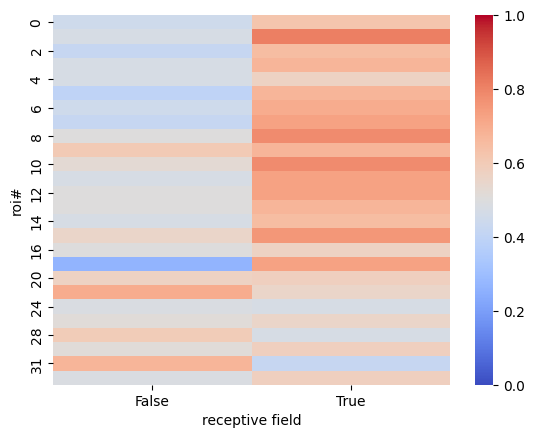

In [25]:
sns.heatmap(scores,vmin = 0, vmax = 1, cmap = "coolwarm")

In [71]:
VGAT_label_column = rois_df['is_VGAT']
VGAT_label_column = VGAT_label_column[~VGAT_label_column.isna()] #remove nans

inhib_rois = VGAT_label_column[VGAT_label_column==True] #pick only inhibitory rois
exit_rois = VGAT_label_column[VGAT_label_column==False] #pick only exitatory rois

score_inhib = scores[  scores.index.isin(  inhib_rois.index  )   ] #select inhibitory rois in scores
score_exit = scores[  scores.index.isin(  exit_rois.index  )   ] #select exitatory rois in scores

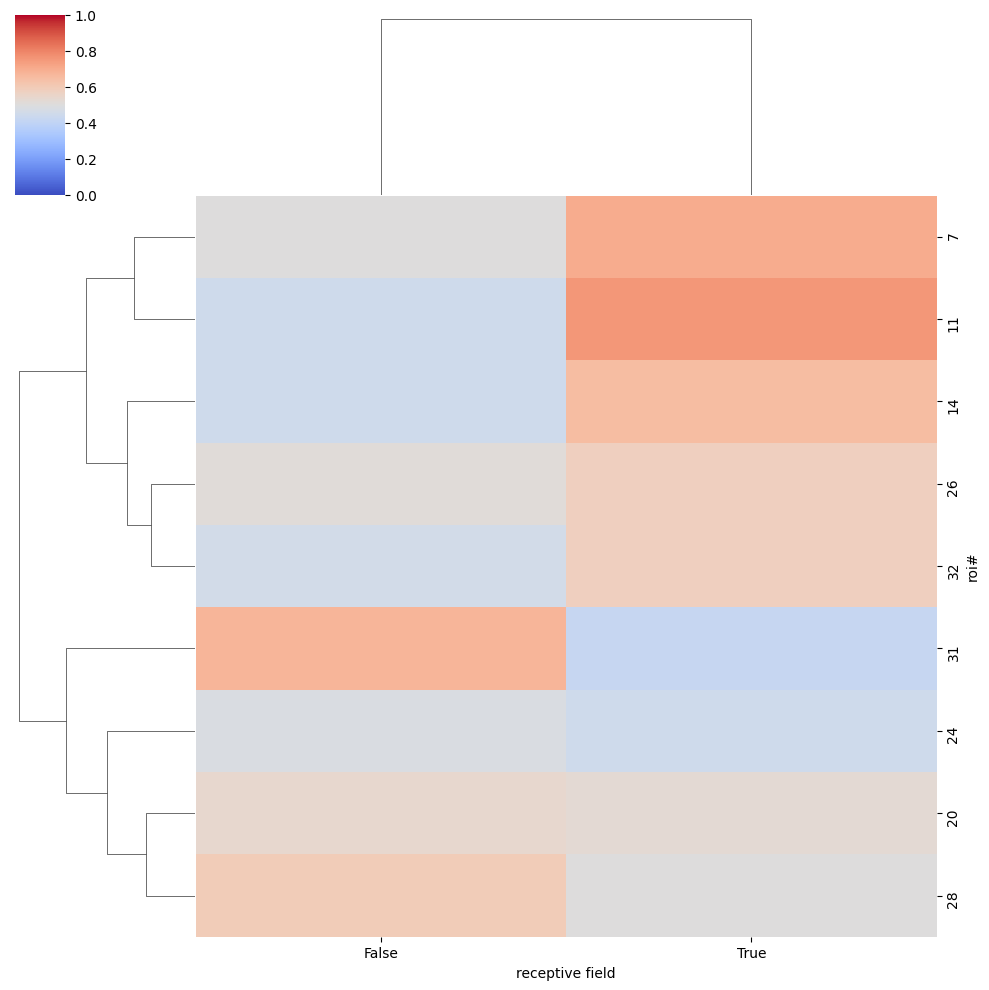

In [85]:
sns.clustermap(score_inhib,vmin = 0, vmax = 1, cmap = "coolwarm")

<Axes: xlabel='receptive field', ylabel='roi#'>

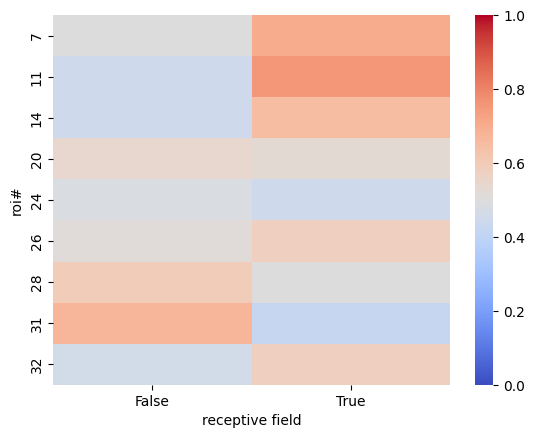

In [86]:
sns.heatmap(score_inhib,vmin = 0, vmax = 1, cmap = "coolwarm")
# adjust spacing between subplots

In [87]:
sns.clustermap(score_exit,vmin = 0, vmax = 1, cmap = "coolwarm") #exactly same input as heatmap

In [27]:
adaptation.classifiers.

Type:        module
String form: <module 'ResearchProjects.adaptation.classifiers' from 'C:\\Users\\mohay\\anaconda3\\envs\\Analysis\\lib\\site-packages\\ResearchProjects\\adaptation\\classifiers.py'>
File:        c:\users\mohay\anaconda3\envs\analysis\lib\site-packages\researchprojects\adaptation\classifiers.py
Docstring:   <no docstring>